## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(1190, 12)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
779,55,1,2,130,262,0,0,155,0,0.0,1,0
682,57,1,4,150,276,0,2,112,1,0.6,2,1
918,60,1,4,117,230,1,0,160,1,1.4,1,1
411,62,1,4,150,0,1,1,78,0,2.0,2,1
332,56,1,4,115,0,1,1,82,0,-1.0,1,1


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   int64  
 2   cp        1190 non-null   int64  
 3   trestbps  1190 non-null   int64  
 4   chol      1190 non-null   int64  
 5   fbs       1190 non-null   int64  
 6   restecg   1190 non-null   int64  
 7   thalach   1190 non-null   int64  
 8   exang     1190 non-null   int64  
 9   oldpeak   1190 non-null   float64
 10  slope     1190 non-null   int64  
 11  target    1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [9]:
#WE HAVE NO MISSING VALUES

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    1190.000000
mean        0.528571
std         0.499393
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([0, 1], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
slope       0.505608
exang       0.481467
cp          0.460127
thalach     0.413278
oldpeak     0.398385
sex         0.311267
age         0.262029
fbs         0.216695
chol        0.198366
trestbps    0.121415
restecg     0.073059
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    629
0    561
Name: target, dtype: int64


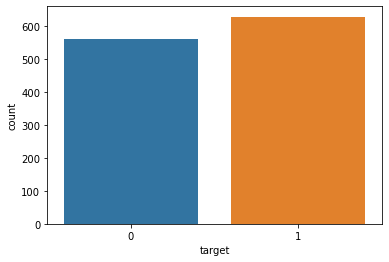

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 185.15
Percentage of patients with heart problems: 207.59


## IV. Train Test split

In [17]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## V. Model Fitting

In [18]:
from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [20]:
Y_pred_lr.shape

(238,)

In [21]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %


In [22]:
print('Classification Report\n', classification_report(Y_test, Y_pred_lr))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       109
           1       0.82      0.83      0.82       129

    accuracy                           0.81       238
   macro avg       0.81      0.80      0.81       238
weighted avg       0.81      0.81      0.81       238



### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [24]:
Y_pred_nb.shape

(238,)

In [25]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.29 %


In [26]:
print('Classification Report\n', classification_report(Y_test, Y_pred_nb))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.87      0.85      0.86       129

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



### SVM

In [27]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [28]:
Y_pred_svm.shape

(238,)

In [29]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.25 %


In [30]:
print('Classification Report\n', classification_report(Y_test, Y_pred_svm))

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       109
           1       0.82      0.82      0.82       129

    accuracy                           0.80       238
   macro avg       0.80      0.80      0.80       238
weighted avg       0.80      0.80      0.80       238



### K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [32]:
Y_pred_knn.shape

(238,)

In [33]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.49 %


In [34]:
print('Classification Report\n', classification_report(Y_test, Y_pred_knn))

Classification Report
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       109
           1       0.71      0.70      0.71       129

    accuracy                           0.68       238
   macro avg       0.68      0.68      0.68       238
weighted avg       0.69      0.68      0.69       238



### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [36]:
print(Y_pred_dt.shape)

(238,)


In [37]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 88.24 %


In [38]:
print('Classification Report\n', classification_report(Y_test, Y_pred_dt))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       109
           1       0.90      0.88      0.89       129

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [40]:
Y_pred_rf.shape

(238,)

In [41]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 94.96 %


In [42]:
print('Classification Report\n', classification_report(Y_test, Y_pred_rf))

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       109
           1       0.95      0.96      0.95       129

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



### XGBoost

In [43]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[00:31:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
Y_pred_xgb.shape

(238,)

In [45]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 92.86 %


In [46]:
print('Classification Report\n', classification_report(Y_test, Y_pred_xgb))

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       109
           1       0.94      0.93      0.93       129

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



## VI. Output final score

In [47]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %
The accuracy score achieved using Naive Bayes is: 85.29 %
The accuracy score achieved using Support Vector Machine is: 80.25 %
The accuracy score achieved using K-Nearest Neighbors is: 68.49 %
The accuracy score achieved using Decision Tree is: 88.24 %
The accuracy score achieved using Random Forest is: 94.96 %
The accuracy score achieved using XGBoost is: 92.86 %


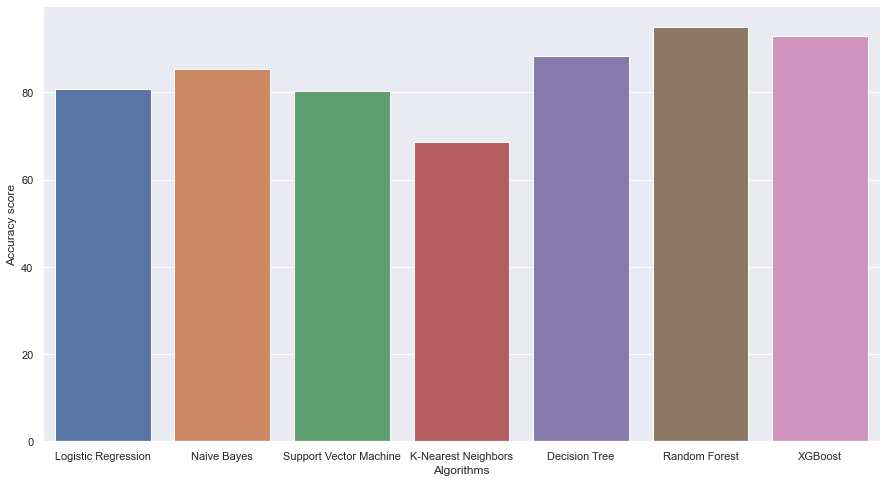

In [48]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [49]:
#ensembling
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[dt,xgb_model,rf],meta_classifier= rf,random_state=42)
scv.fit(X_train,Y_train)
scv_predicted = scv.predict(X_test)
#scv_conf_matrix = confusion_matrix(Y_test, scv_predicted)
scv_acc_score = accuracy_score(Y_test, scv_predicted)
#print("confusion matrix")
#print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
#print(classification_report(Y_test,scv_predicted))

[00:31:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy of StackingCVClassifier: 94.53781512605042 



In [50]:
print('Classification Report\n', classification_report(Y_test, scv_predicted))

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       109
           1       0.94      0.96      0.95       129

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



In [51]:
# Creating a pickle file for the classifier
import pickle
filename = 'heart-disease-prediction.pkl'
pickle.dump(scv, open(filename, 'wb'))